In [24]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import linregress


# Read the City and Ride Data

attitudes = pd.read_csv("Data/duke_energy_2010.csv")
attitudes.head()

,zip,SAMPLE_ID,SAMPLE_ENERGY,SAMPLE_USAGE,SAMPLE_REVENUE,SAMPLE_HHAGE,SAMPLE_INC,SAMPLE_REGION,SAMPLE_ACCOUNT_ACTIVATION_DATE,SAMPLE_MAILING_ADDRESS,...,ccreal,scarce,nuclear,solar,wind,muchasican,futurepower,phev,Q7,_merge
0,27603,10100106,17765,1480.420044,1899.530029,4,6,NORTHERN REGION,20070731,180 TRAVEL LITE DR,...,2.0,5.0,8.0,6.0,6.0,10.0,3.0,1.0,5,matched (3)
1,27807,10100111,17818,1484.829956,1919.380005,6,4,NORTHERN REGION,19910523,7554 SQUIRREL DEN RD,...,9.0,1.0,10.0,10.0,4.0,8.0,9.0,9.0,5,matched (3)
2,27540,10100131,18013,1501.079956,1950.459961,3,8,NORTHERN REGION,20040622,729 LITTLE LEAF CT,...,1.0,8.0,5.0,8.0,8.0,4.0,8.0,5.0,6,matched (3)
3,27545,10100146,18062,1505.170044,1819.969971,3,5,NORTHERN REGION,20000417,406 PINE RUN,...,10.0,9.0,4.0,10.0,8.0,8.0,9.0,4.0,3,matched (3)
4,27616,10100171,18333,1527.750000,1695.010010,4,3,NORTHERN REGION,19920313,3416 TUNAS ST,...,10.0,10.0,10.0,10.0,7.0,6.0,7.0,1.0,4,matched (3)


In [2]:
# Creating scales based on shared constructs: "greeness" "first adopter" "conserver"

greenness = []

for index, row in attitudes.iterrows():
    greenness.append(row.conscientiousrecycle + row.ccreal + row.reduceenergy + row.willingchanges)



conserver = []

for index, row in attitudes.iterrows():
    conserver.append(row.muchasican + row.realeffort  + row.payattn)
    
firstadopter = []

for index, row in attitudes.iterrows():
    firstadopter.append(row.firstone + row.phev + row.mycellphone)


In [3]:
attitudes["greenness"]=pd.Series(greenness)/4
attitudes["conserver"]=pd.Series(conserver)/3
attitudes["firstadopter"]=pd.Series(firstadopter)/3

attitudes.head(20)


,zip,SAMPLE_ID,SAMPLE_ENERGY,SAMPLE_USAGE,SAMPLE_REVENUE,SAMPLE_HHAGE,SAMPLE_INC,SAMPLE_REGION,SAMPLE_ACCOUNT_ACTIVATION_DATE,SAMPLE_MAILING_ADDRESS,...,solar,wind,muchasican,futurepower,phev,Q7,_merge,greenness,conserver,firstadopter
0,27603,10100106,17765,1480.420044,1899.530029,4,6,NORTHERN REGION,20070731,180 TRAVEL LITE DR,...,6.0,6.0,10.0,3.0,1.0,5,matched (3),3.75,8.333333,5.333333
1,27807,10100111,17818,1484.829956,1919.380005,6,4,NORTHERN REGION,19910523,7554 SQUIRREL DEN RD,...,10.0,4.0,8.0,9.0,9.0,5,matched (3),7.00,7.333333,6.333333
2,27540,10100131,18013,1501.079956,1950.459961,3,8,NORTHERN REGION,20040622,729 LITTLE LEAF CT,...,8.0,8.0,4.0,8.0,5.0,6,matched (3),5.50,6.000000,7.666667
3,27545,10100146,18062,1505.170044,1819.969971,3,5,NORTHERN REGION,20000417,406 PINE RUN,...,10.0,8.0,8.0,9.0,4.0,3,matched (3),8.00,8.666667,4.333333
4,27616,10100171,18333,1527.750000,1695.010010,4,3,NORTHERN REGION,19920313,3416 TUNAS ST,...,10.0,7.0,6.0,7.0,1.0,4,matched (3),8.50,7.333333,3.666667
5,27609,10100211,18734,1561.170044,1853.449951,5,9,NORTHERN REGION,19920814,2109 TREVERTON PL,...,5.0,3.0,10.0,9.0,5.0,5,matched (3),8.75,9.666667,6.333333
6,27612,10100241,19144,1595.329956,1959.550049,4,0,NORTHERN REGION,19890727,2421 BASIL DR,...,5.0,5.0,6.0,9.0,10.0,6,matched (3),8.50,8.666667,5.666667
7,27573,10100261,19334,1611.170044,2082.909912,5,7,NORTHERN REGION,20071011,510 W GORDON ST,...,10.0,10.0,8.0,8.0,8.0,5,matched (3),7.75,7.333333,5.333333
8,27603,10100276,19417,1618.079956,2001.609985,5,7,NORTHERN REGION,19871218,537 MAPLE LN,...,9.0,9.0,8.0,8.0,7.0,5,matched (3),8.50,8.666667,7.333333
9,27606,10100291,19498,1624.829956,1966.479980,5,6,NORTHERN REGION,19770610,4609 WOODSIDE CT,...,8.0,8.0,7.0,7.0,2.0,5,matched (3),6.50,7.000000,3.000000


In [4]:
# Remove missing values

## First diagnose missingess - print total observations for each survey item
# counts only non-missing
total_rows = attitudes.count()
print(total_rows)


zip                               4705
SAMPLE_ID                         4705
SAMPLE_ENERGY                     4705
SAMPLE_USAGE                      4705
SAMPLE_REVENUE                    4705
SAMPLE_HHAGE                      4705
SAMPLE_INC                        4705
SAMPLE_REGION                     4705
SAMPLE_ACCOUNT_ACTIVATION_DATE    4705
SAMPLE_MAILING_ADDRESS            4705
SAMPLE_MAILING_CITY               4705
SAMPLE_MAILING_STATE              4705
SAMPLE_MAILING_ZIP                4705
SAMPLE_PRIMARY_PHONE              4705
SAMPLE_SECONDARY_PHONE            4705
SAMPLE_PREMISE_ADDRESS            4705
SAMPLE_PREMISE_CITY               4705
SAMPLE_PREMISE_STATE              4705
SAMPLE_PREMISE_ZIP                4705
SAMPLE_PREMISE_COUNTY             4705
SAMPLE_MONTHS                     4705
SAMPLE_DWELLING                   4705
SAMPLE_FAMCOMP                    4705
SAMPLE_HHADULTS                   4705
SAMPLE_HHCHILDS                   4705
SAMPLE_HHPEOPLE          

In [5]:
attitudes_clean= attitudes.dropna(subset=['greenness', 'conserver', 'firstadopter'])
total_rows = attitudes_clean.count()
print(total_rows)

zip                               4069
SAMPLE_ID                         4069
SAMPLE_ENERGY                     4069
SAMPLE_USAGE                      4069
SAMPLE_REVENUE                    4069
SAMPLE_HHAGE                      4069
SAMPLE_INC                        4069
SAMPLE_REGION                     4069
SAMPLE_ACCOUNT_ACTIVATION_DATE    4069
SAMPLE_MAILING_ADDRESS            4069
SAMPLE_MAILING_CITY               4069
SAMPLE_MAILING_STATE              4069
SAMPLE_MAILING_ZIP                4069
SAMPLE_PRIMARY_PHONE              4069
SAMPLE_SECONDARY_PHONE            4069
SAMPLE_PREMISE_ADDRESS            4069
SAMPLE_PREMISE_CITY               4069
SAMPLE_PREMISE_STATE              4069
SAMPLE_PREMISE_ZIP                4069
SAMPLE_PREMISE_COUNTY             4069
SAMPLE_MONTHS                     4069
SAMPLE_DWELLING                   4069
SAMPLE_FAMCOMP                    4069
SAMPLE_HHADULTS                   4069
SAMPLE_HHCHILDS                   4069
SAMPLE_HHPEOPLE          

In [6]:
attitudes_clean.to_csv("Data/attitudes_clean2.csv", index=False)


In [17]:
# Calculate Avereges by zip code
zip_att =attitudes_clean.groupby(["zip"]).mean()
#["myright," "ccisreal"]
#"greenness", "conserver", "firstadopter", "incomeonreport"]
zip_att.head()

,SAMPLE_ID,SAMPLE_ENERGY,SAMPLE_USAGE,SAMPLE_REVENUE,SAMPLE_HHAGE,SAMPLE_ACCOUNT_ACTIVATION_DATE,SAMPLE_MAILING_ZIP,SAMPLE_PREMISE_ZIP,SAMPLE_PREMISE_COUNTY,SAMPLE_MONTHS,...,nuclear,solar,wind,muchasican,futurepower,phev,Q7,greenness,conserver,firstadopter
zip,,,,,,,,,,,,,,,,,,,,,
0,20205886.0,19051.500000,1587.625000,2026.784973,5.000000,2.001088e+07,2.800097e+08,0.000000e+00,144.0,12.000000,...,8.000000,8.5,8.000000,6.000000,8.000000,3.500000,6.500000,8.000000,6.333333,6.666667
27203,14772301.0,12622.615385,1060.595376,1332.591529,4.807692,1.988295e+07,2.720449e+08,2.720348e+08,144.0,11.692308,...,6.846154,8.0,7.961538,7.615385,7.961538,5.192308,8.576923,7.221154,7.705128,4.589744
27205,10110873.5,19252.500000,1604.375000,2048.849976,4.000000,2.005032e+07,2.720546e+08,2.720505e+08,144.0,12.000000,...,6.500000,5.5,3.000000,7.500000,7.500000,5.500000,5.000000,6.875000,7.666667,6.000000
27207,10112766.0,14575.000000,1214.579956,1569.160034,3.000000,1.994050e+07,2.720787e+08,2.720787e+08,110.0,12.000000,...,5.000000,4.0,4.000000,6.000000,6.000000,4.000000,9.000000,4.000000,7.000000,4.666667
27208,10110851.0,6101.000000,508.420013,703.440002,5.000000,2.006112e+07,2.720881e+08,2.720881e+08,144.0,12.000000,...,8.000000,8.0,8.000000,10.000000,10.000000,3.000000,10.000000,9.250000,10.000000,5.666667


In [18]:
total_rows1 = zip_att.count()
print(total_rows1)

SAMPLE_ID                         500
SAMPLE_ENERGY                     500
SAMPLE_USAGE                      500
SAMPLE_REVENUE                    500
SAMPLE_HHAGE                      500
SAMPLE_ACCOUNT_ACTIVATION_DATE    500
SAMPLE_MAILING_ZIP                500
SAMPLE_PREMISE_ZIP                500
SAMPLE_PREMISE_COUNTY             500
SAMPLE_MONTHS                     500
SAMPLE_DWELLING                   500
SAMPLE_FAMCOMP                    500
SAMPLE_HHADULTS                   500
SAMPLE_HHCHILDS                   500
SAMPLE_HHPEOPLE                   500
SAMPLE_HOMEOWN                    500
SAMPLE_ADDRYEAR                   500
SAMPLE_CELL                       500
SAMPLE_VER_NUM                    500
SAMPLE_RDM_ID                     500
SAMPLE_RDM_                       500
annkwh                            500
envprotection                     500
windpriority                      500
costpriority                      500
comfortpriority                   500
takensteps  

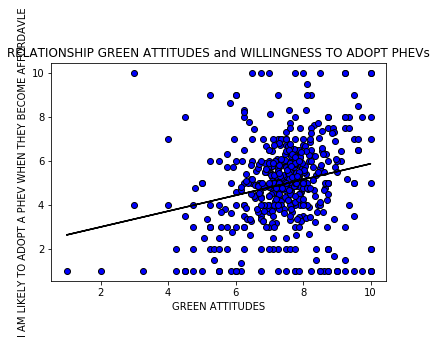

In [58]:
# #Exploratory graphs

x_axis = zip_att[['greenness']]
y_axis = zip_att[['phev']]

plt.title("RELATIONSHIP GREEN ATTITUDES and WILLINGNESS TO ADOPT PHEVs")
plt.xlabel("GREEN ATTITUDES")
plt.ylabel("I AM LIKELY TO ADOPT A PHEV WHEN THEY BECOME AFFORDAVLE")
plt.scatter(x_axis, y_axis, marker="o", color="blue", edgecolor="black")

x1 = zip_att.greenness
y1 = zip_att.phev
stats1 = linregress(x1, y1)
m1 = stats1.slope
b1 = stats1.intercept
plt.plot(x1, m1 * x1 + b1, color="black")
plt.show()


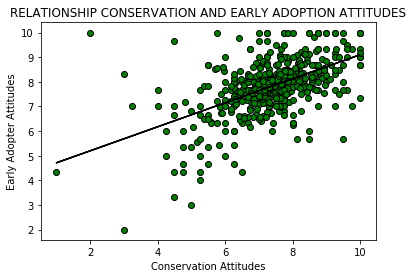

In [53]:
x_axis = zip_att[['greenness']]
y_axis = zip_att[['conserver']]

plt.title("RELATIONSHIP CONSERVATION AND EARLY ADOPTION ATTITUDES")
plt.xlabel("Conservation Attitudes")
plt.ylabel("Early Adopter Attitudes")
plt.scatter(x_axis, y_axis, marker="o", color="green", edgecolor="black")

x1 = zip_att.greenness
y1 = zip_att.conserver
stats1 = linregress(x1, y1)
m1 = stats1.slope
b1 = stats1.intercept
plt.plot(x1, m1 * x1 + b1, color="black")

plt.show()

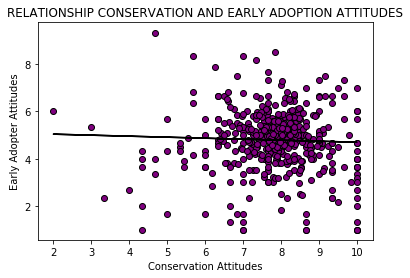

In [46]:
x_axis = zip_att[['conserver']]
y_axis = zip_att[['firstadopter']]

plt.title("RELATIONSHIP CONSERVATION AND EARLY ADOPTION ATTITUDES")
plt.xlabel("Conservation Attitudes")
plt.ylabel("Early Adopter Attitudes")
plt.scatter(x_axis, y_axis, marker="o", color="purple", edgecolor="black")

x1 = zip_att.conserver
y1 = zip_att.firstadopter
stats1 = linregress(x1, y1)
m1 = stats1.slope
b1 = stats1.intercept
plt.plot(x1, m1 * x1 + b1, color="black")

plt.show()